In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# import os
# os.makedirs("charts", exist_ok=True)


In [53]:

orders = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_orders_dataset.csv')
order_items = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_order_items_dataset.csv')
customers = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_customers_dataset.csv')
products = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_products_dataset.csv')
sellers = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_sellers_dataset.csv')
geolocation = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_geolocation_dataset.csv')
order_payments = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/olist_order_reviews_dataset.csv')
category_translation = pd.read_csv('C:/Users/Admin/Downloads/Olist-Dataset/product_category_name_translation.csv')


In [54]:
orders.head()
orders.info()
orders['order_status'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [55]:
# Check how many rows/columns
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Customers:", customers.shape)
print("Products:", products.shape)
print("Sellers:", sellers.shape)
print("Geo:", geolocation.shape)
print("Payments:", order_payments.shape)
print("Reviews:", order_reviews.shape)
print("Category Names:", category_translation.shape)


Orders: (99441, 8)
Order Items: (112650, 7)
Customers: (99441, 5)
Products: (32951, 9)
Sellers: (3095, 4)
Geo: (1000163, 5)
Payments: (103886, 5)
Reviews: (99224, 7)
Category Names: (71, 2)


In [56]:
# Preview data
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18-11-2017 19:28,18-11-2017 19:45,22-11-2017 13:39,02-12-2017 00:28,15-12-2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13-02-2018 21:18,13-02-2018 22:20,14-02-2018 19:46,16-02-2018 18:17,26-02-2018 00:00


In [57]:
order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15-08-2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13-02-2017 13:57,199.90,18.14


In [58]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [59]:

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [60]:
orders['order_status'].value_counts()


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [61]:
abandoned_orders = orders[orders['order_status'].isin(['canceled', 'unavailable'])]

In [62]:
abandoned_orders.shape

(1234, 8)

In [63]:
abandoned_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,16-11-2017 15:09,16-11-2017 15:26,NaN,NaN,05-12-2017 00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,04-08-2018 14:29,07-08-2018 04:10,NaN,NaN,14-08-2018 00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,31-01-2018 11:31,31-01-2018 14:23,NaN,NaN,16-02-2018 00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,26-01-2018 21:34,26-01-2018 21:58,29-01-2018 22:33,NaN,22-02-2018 00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,14-08-2017 17:38,17-08-2017 00:15,NaN,NaN,05-09-2017 00:00


In [64]:
#what items were in abandoned orders.
abandoned_items = pd.merge(
    abandoned_orders[['order_id', 'customer_id']],
    order_items,
    on='order_id',
    how='left'
)
abandoned_items.head()


,order_id,customer_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,NaN,NaN,NaN,NaN,NaN,NaN
1,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,1.0,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,14-08-2018 04:10,25.0,8.34
2,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,NaN,NaN,NaN,NaN,NaN,NaN
3,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,1.0,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,01-02-2018 21:58,69.9,26.11
4,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#Add product details.
abandoned_items = pd.merge(
    abandoned_items,
    products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)
abandoned_items.head()

,order_id,customer_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,1.0,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,14-08-2018 04:10,25.0,8.34,informatica_acessorios
2,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,1.0,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,01-02-2018 21:58,69.9,26.11,moveis_decoracao
4,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#Add Customer details.
abandoned_items = pd.merge(
    abandoned_items,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)
abandoned_items.head()

,order_id,customer_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id
0,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50
1,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,1.0,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,14-08-2018 04:10,25.0,8.34,informatica_acessorios,8ea097b1824dbd4d17af71b0afe04301
2,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677
3,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,1.0,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,01-02-2018 21:58,69.9,26.11,moveis_decoracao,c4ebedb09beb89cc0314c5c0c33f8053
4,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685


In [67]:
#Top 10 most abandoned product categories:
abandoned_items['product_category_name'].value_counts().head(10)


product_category_name
esporte_lazer             51
utilidades_domesticas     49
informatica_acessorios    46
beleza_saude              36
moveis_decoracao          36
brinquedos                34
automotivo                31
bebes                     22
relogios_presentes        21
ferramentas_jardim        19
Name: count, dtype: int64

In [68]:
#How many orders were abandoned by unique customers?
abandoned_items['customer_unique_id'].nunique()


1220

In [69]:
#Which customers abandoned the most?
abandoned_items['customer_unique_id'].value_counts().head(10)


customer_unique_id
22af178809fa6887af2cc4f7d7bdc0bc    6
5b8e2b1579f85b73591611c56267d7f7    6
244024d753ef305e66b7ef97f3813ebd    6
9f93044b0156639ec44b7ecfca3b9c31    5
57668c60f87bc896997917dace48bcac    5
7e2ae24e734d02f10866ccab9c7ad0c8    5
e75fd09539dff5c7c80a12781404ffea    5
c69639ce8dcb5bdba265004531a3747a    5
8be62615a1d342d4113d8d30cf30cf55    5
e3fe811011101628e80a7953f1244c8d    5
Name: count, dtype: int64

In [70]:
#Average price of abandoned items:
abandoned_items['price'].mean()

177.12743169398905

In [71]:
#Most expensive product abandoned:
abandoned_items.sort_values('price', ascending=False).head(1)


,order_id,customer_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id
992,83e6338b5cf25dcf222551cb8da8d0d6,3690e975641f01bd07ad635f03dbb894,1.0,122bedead6e7541d311e6e0ab3cf248f,961dff0a659b4561334372337dd897d9,24-08-2017 10:04,2649.0,43.82,cool_stuff,60b2ec19b8c18082cdb5180106a97cb5


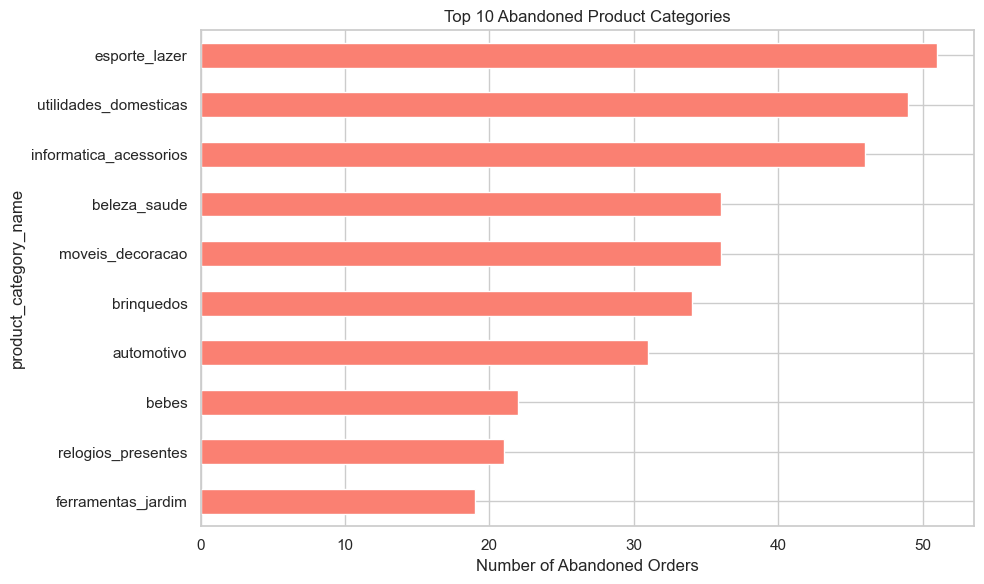

In [73]:
#Top 10 Abandoned Product Categories
plt.figure(figsize=(10,6))
abandoned_items['product_category_name'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Abandoned Product Categories')
plt.xlabel('Number of Abandoned Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Olist/top_categories.png', dpi=300, bbox_inches='tight')
plt.show()


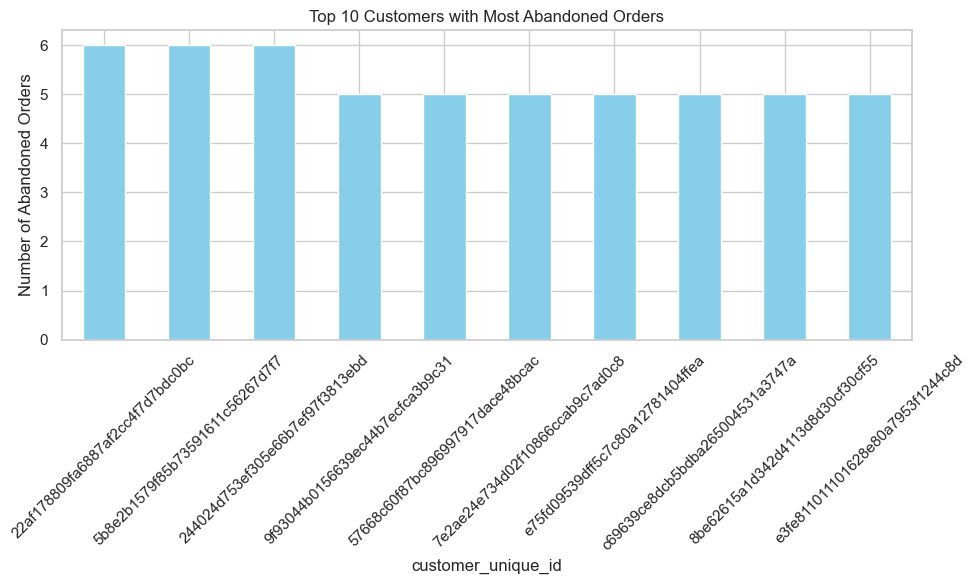

In [75]:
#Top 10 Customers Who Abandoned Orders
plt.figure(figsize=(10,6))
abandoned_items['customer_unique_id'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers with Most Abandoned Orders')
plt.ylabel('Number of Abandoned Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Olist/Customers_Abandoned_Orders.png', dpi=300, bbox_inches='tight')
plt.show()


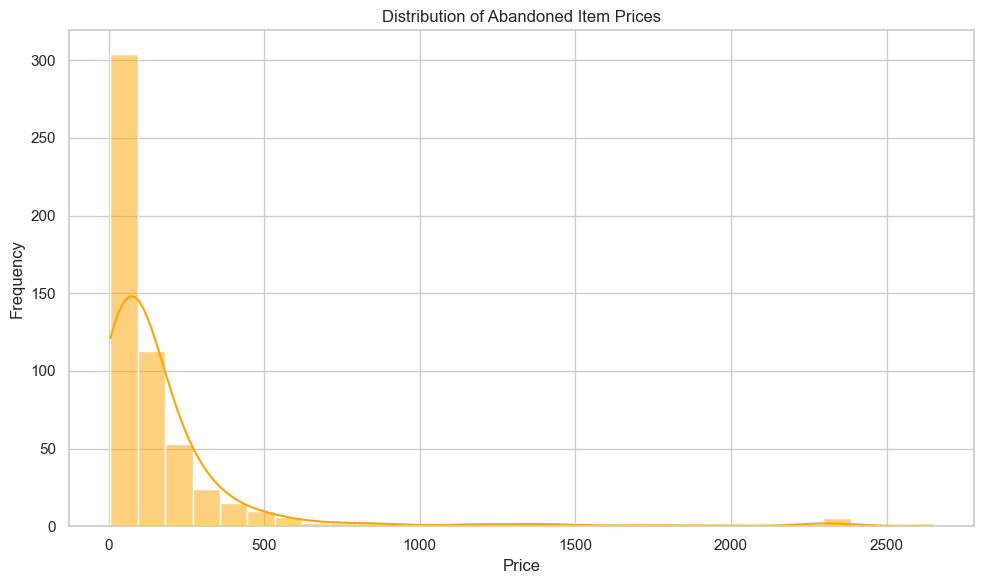

In [76]:
#Distribution of Abandoned Item Prices
plt.figure(figsize=(10,6))
sns.histplot(abandoned_items['price'], bins=30, kde=True, color='orange')
plt.title('Distribution of Abandoned Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Olist/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


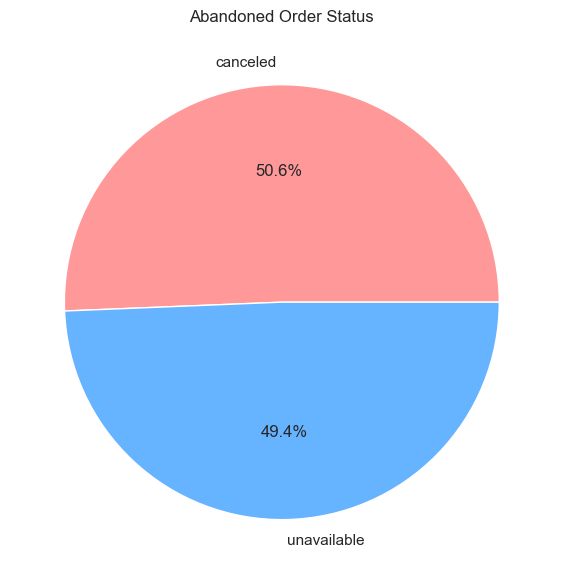

In [79]:
#Pie Chart – Abandoned Order Status Breakdown
status_counts = abandoned_orders['order_status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B3FF'])
plt.title('Abandoned Order Status')
plt.tight_layout()
plt.show()
